In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [3]:
# mnist = tf.keras.datasets.mnist
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_test = X_train /255, X_test /255
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [5]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 17s 3ms/step - loss: 0.2764 - accuracy: 0.9123
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0987 - accuracy: 0.9701
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0742 - accuracy: 0.9777


In [19]:
modelll = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

modelll.build(input_shape=(None, 32, 32, 3))

modelll.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

# plot_model(model=modelll, show_shapes=True)

In [18]:
modelll.fit(X_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 8s 4ms/step - loss: 1.4036 - accuracy: 0.4961
Epoch 2/3
 565/1563 [=========>....................] - ETA: 4s - loss: 1.1128 - accuracy: 0.6055

KeyboardInterrupt: ignored

In [ ]:
input_img = tf.keras.layers.Input(shape = (28, 28, 1))

block1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=2)
])(input_img)

block2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
])(block1)

block3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
])(block2)

block_dens = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])(block3)

model_new = tf.keras.models.Model(inputs=input_img, outputs=block_dens)

# plot_model(model=model_new, show_shapes=True)

model_new.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

X_train_filt = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test_filt = X_test.reshape(10000, 28, 28, 1).astype('float32')

model_new.fit(X_train_filt, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1717 - accuracy: 0.9480
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0665 - accuracy: 0.9790
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0507 - accuracy: 0.9840


In [ ]:
input_img = tf.keras.layers.Input(shape = (28, 28, 1))

conv1 = tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu')(input_img)
batch1 = tf.keras.layers.BatchNormalization()(conv1)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=2)(batch1)

conv2 = tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu')(pool1)
batch2 = tf.keras.layers.BatchNormalization()(conv2)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(batch2)


conv3 = tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu')(pool2)
batch3 = tf.keras.layers.BatchNormalization()(conv3)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(batch3)

dens1 = tf.keras.layers.Flatten()(pool3)
dens2 = tf.keras.layers.Dense(64, activation='relu')(dens1)
dens3 = tf.keras.layers.Dense(10, activation='softmax')(dens2)

model_new2 = tf.keras.models.Model(inputs=input_img, outputs=dens3)

# plot_model(model=model_new2, show_shapes=True)

X_train_filt = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test_filt = X_test.reshape(10000, 28, 28, 1).astype('float32')

model_new2.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model_new2.fit(X_train_filt, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1791 - accuracy: 0.9470
Epoch 2/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0649 - accuracy: 0.9800
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0502 - accuracy: 0.9848


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [ ]:
modelll.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# input data dont have channel index and we set it to 1 because the image are grey===. (b, h, w, channel in)

X_train_filt = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test_filt = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
model.fit(X_train_filt, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2756 - accuracy: 0.9134
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1047 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0762 - accuracy: 0.9762


In [ ]:
criteon = tf.keras.losses.sparse_categorical_crossentropy(from_logits=True)


TypeError: ignored

In [ ]:
modelll.fit(X_train_filt, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1735 - accuracy: 0.9491
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0647 - accuracy: 0.9802
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0499 - accuracy: 0.9843


In [ ]:
model.evaluate(X_test_filt, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0628 - accuracy: 0.9809


[0.06275031715631485, 0.98089998960495]

In [ ]:
# ordinary Dense NN

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(60,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss=tf.keras.losses.sparse_categorical_crossentropy,
               metrics='accuracy')

In [ ]:
model2.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9522 - accuracy: 0.8769
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2344 - accuracy: 0.9383
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1809 - accuracy: 0.9500


In [ ]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 2.1932 - accuracy: 0.4738


[2.193235397338867, 0.47380000352859497]

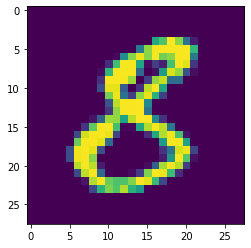

In [ ]:
test_image = X_test[1234]
plt.imshow(test_image.reshape(28, 28))

In [ ]:
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = test_image.reshape(1, 28, 28, 1)

In [ ]:
res = model.predict(test_image)
num = np.round(res)
num

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
num.argmax()

8

In [ ]:
im = tf.keras.preprocessing.image.load_img('/content/Unknown-2.png')
im_arr = tf.keras.preprocessing.image.img_to_array(im)
im_arr = tf.image.rgb_to_grayscale(im_arr)
# tf.keras.preprocessing.image.array_to_img(im_arr)
im_arr.shape

TensorShape([230, 219, 1])

In [ ]:
im_arr = tf.image.resize(im_arr, (28, 28))
im_arr = im_arr /255
im_arr = tf.reshape(im_arr, (1, 28, 28, 1))

proto_tensor = tf.make_tensor_proto(im_arr)
im_arr = tf.make_ndarray(proto_tensor)

res = model.predict(im_arr)

res.argmax()

1